In [334]:
import pandas as pd
import numpy as np
import seaborn as sns

## load main dataset

In [335]:
df = pd.read_csv("data/main_dataset.csv")
print(df.shape)
df.head()

(2211, 55)


,gas_key,gas_name,gas_lat,gas_long,attr_cnt_1mile,attr_cnt_5mile,attr_name,attr_lat,attr_long,distance_to_nearest_attr,...,nri_risk_rating,nri_intpt_lat,nri_intpt_long,nri_zipcode,census_tract_area,census_tract_category,traff_cnt_10m_avg,traff_cnt_10m_max,traff_cnt_5m_avg,traff_cnt_5m_max
0,0,24 Hour Express Fuel,48.393760,-122.329806,0,1,Skagit County Fairgrounds,48.408145,-122.340118,1.1020,...,Relatively High,48.404815,-122.340554,98273.0,0.002191,2.0,21209.859155,72000,23733.802817,72000
1,1,76,47.191712,-120.916225,0,1,KBHR Set,47.223241,-120.993224,4.2247,...,NaN,NaN,NaN,NaN,0.000584,2.0,11678.727273,36000,9901.025641,34000
2,2,76,47.238704,-122.357577,0,4,Wagon Trail,47.275437,-122.308897,3.4174,...,Relatively High,47.249149,-122.364191,98424.0,0.001614,2.0,39766.900000,219000,43117.857143,219000
3,3,76,48.435227,-122.291324,0,1,Skagit County Fairgrounds,48.408145,-122.340118,2.9200,...,NaN,NaN,NaN,NaN,0.001533,2.0,20470.068493,72000,23101.204819,72000
4,4,76,47.839608,-120.014523,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.018331,0.0,5653.947368,12000,6723.076923,12000


In [336]:
df.isna().sum()

gas_key                                0
gas_name                             617
gas_lat                                0
gas_long                               0
attr_cnt_1mile                         0
attr_cnt_5mile                         0
attr_name                           1009
attr_lat                             965
attr_long                            965
distance_to_nearest_attr             965
crime_coord                            0
crime_county                           0
crime_population                      41
violent_crime                         41
murder_nonnegligent_manslaughter      41
Rape1                                 41
Robbery                               41
aggravated_assault                    41
property_crime                        41
Burglary                              41
larceny_theft                         41
motor_vehicle_theft                   41
Arson                                 41
total_crime                           41
exit_name       

In [337]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2211 entries, 0 to 2210
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   gas_key                           2211 non-null   int64  
 1   gas_name                          1594 non-null   object 
 2   gas_lat                           2211 non-null   float64
 3   gas_long                          2211 non-null   float64
 4   attr_cnt_1mile                    2211 non-null   int64  
 5   attr_cnt_5mile                    2211 non-null   int64  
 6   attr_name                         1202 non-null   object 
 7   attr_lat                          1246 non-null   float64
 8   attr_long                         1246 non-null   float64
 9   distance_to_nearest_attr          1246 non-null   float64
 10  crime_coord                       2211 non-null   object 
 11  crime_county                      2211 non-null   object 
 12  crime_

## Divide dataset into metadata, and training dataset

In [338]:
df_meta = df[['gas_key', 'gas_name','gas_lat', 'gas_long','Closest_EV_Station_name', 'Closest_EV_Station_lat', 'Closest_EV_Station_long', 
            'attr_name','attr_lat', 'attr_long','crime_coord','crime_county','highway','exit_name', 'exit_lat', 'exit_long', 'distance_to_nearest_exit','nri_geoid','nri_county','nri_risk_rating','nri_intpt_lat', 'nri_intpt_long', 'nri_zipcode']]
df_train = df.drop(columns=['gas_name','gas_lat', 'gas_long', 'attr_name','attr_lat', 'attr_long',
            'crime_coord','crime_county', 'Closest_EV_Station_name', 'Closest_EV_Station_lat', 'Closest_EV_Station_long',
            'exit_name', 'exit_lat', 'exit_long', 'distance_to_nearest_exit', 'highway',
            'nri_county','nri_risk_rating','nri_intpt_lat', 'nri_intpt_long', 'nri_zipcode',
            'nri_agri_value', 'nri_build_value', 'nri_area'])

In [339]:
df_train.head()

,gas_key,attr_cnt_1mile,attr_cnt_5mile,distance_to_nearest_attr,crime_population,violent_crime,murder_nonnegligent_manslaughter,Rape1,Robbery,aggravated_assault,...,distance_to_closest_ev_station,nri_geoid,nri_population,nri_risk_score,census_tract_area,census_tract_category,traff_cnt_10m_avg,traff_cnt_10m_max,traff_cnt_5m_avg,traff_cnt_5m_max
0,0,0,1,1.1020,75160.0,105.0,2.0,24.0,28.0,51.0,...,0.4026,5.305795e+10,3821.0,25.815695,0.002191,2.0,21209.859155,72000,23733.802817,72000
1,1,0,1,4.2247,24313.0,50.0,0.0,12.0,6.0,32.0,...,0.6466,5.303798e+10,NaN,NaN,0.000584,2.0,11678.727273,36000,9901.025641,34000
2,2,0,4,3.4174,471475.0,2836.0,19.0,285.0,654.0,1878.0,...,0.6797,5.305394e+10,3945.0,35.360714,0.001614,2.0,39766.900000,219000,43117.857143,219000
3,3,0,1,2.9200,75160.0,105.0,2.0,24.0,28.0,51.0,...,0.9865,5.305795e+10,NaN,NaN,0.001533,2.0,20470.068493,72000,23101.204819,72000
4,4,0,0,NaN,34513.0,62.0,1.0,16.0,10.0,35.0,...,0.1992,5.300796e+10,NaN,NaN,0.018331,0.0,5653.947368,12000,6723.076923,12000


In [340]:
df_train.set_index('gas_key', inplace=True)
print(df_train.columns.values)
print(df_train.shape)
df_train.head()

['attr_cnt_1mile' 'attr_cnt_5mile' 'distance_to_nearest_attr'
 'crime_population' 'violent_crime' 'murder_nonnegligent_manslaughter'
 'Rape1' 'Robbery' 'aggravated_assault' 'property_crime' 'Burglary'
 'larceny_theft' 'motor_vehicle_theft' 'Arson' 'total_crime'
 'num_EV_in_2_miles_of_gas' 'num_EV_in_5_miles_of_gas'
 'num_EV_in_10_miles_of_gas' 'num_EV_in_20_miles_of_gas'
 'num_EV_in_50_miles_of_gas' 'distance_to_closest_ev_station' 'nri_geoid'
 'nri_population' 'nri_risk_score' 'census_tract_area'
 'census_tract_category' 'traff_cnt_10m_avg' 'traff_cnt_10m_max'
 'traff_cnt_5m_avg' 'traff_cnt_5m_max']
(2211, 30)


,attr_cnt_1mile,attr_cnt_5mile,distance_to_nearest_attr,crime_population,violent_crime,murder_nonnegligent_manslaughter,Rape1,Robbery,aggravated_assault,property_crime,...,distance_to_closest_ev_station,nri_geoid,nri_population,nri_risk_score,census_tract_area,census_tract_category,traff_cnt_10m_avg,traff_cnt_10m_max,traff_cnt_5m_avg,traff_cnt_5m_max
gas_key,,,,,,,,,,,,,,,,,,,,,
0,0,1,1.1020,75160.0,105.0,2.0,24.0,28.0,51.0,2343.0,...,0.4026,5.305795e+10,3821.0,25.815695,0.002191,2.0,21209.859155,72000,23733.802817,72000
1,0,1,4.2247,24313.0,50.0,0.0,12.0,6.0,32.0,729.0,...,0.6466,5.303798e+10,NaN,NaN,0.000584,2.0,11678.727273,36000,9901.025641,34000
2,0,4,3.4174,471475.0,2836.0,19.0,285.0,654.0,1878.0,19355.0,...,0.6797,5.305394e+10,3945.0,35.360714,0.001614,2.0,39766.900000,219000,43117.857143,219000
3,0,1,2.9200,75160.0,105.0,2.0,24.0,28.0,51.0,2343.0,...,0.9865,5.305795e+10,NaN,NaN,0.001533,2.0,20470.068493,72000,23101.204819,72000
4,0,0,NaN,34513.0,62.0,1.0,16.0,10.0,35.0,638.0,...,0.1992,5.300796e+10,NaN,NaN,0.018331,0.0,5653.947368,12000,6723.076923,12000


## missing values

In [341]:
# from nri_data_wrangling.ipynb we manually assigned the three points to the nearest census tract
# nri_geoid : 53073940002, 53033003201, 53033005600
df_train.loc[305, 'nri_geoid'] = 53073940002
df_train.loc[526, 'nri_geoid'] = 53033003201
df_train.loc[747, 'nri_geoid'] = 53033005600

df_train.loc[305, 'census_tract_area'] = 0.004185
df_train.loc[526, 'census_tract_area'] = 0.000195
df_train.loc[747, 'census_tract_area'] = 0.00037

df_train.loc[305, 'census_tract_category'] = 1
df_train.loc[526, 'census_tract_category'] = 2
df_train.loc[747, 'census_tract_category'] = 2

df_train.loc[747, 'nri_population'] = 6382.0	
df_train.loc[747, 'nri_risk_score'] = 27.007241

In [342]:
df_train.isna().sum().sort_values(ascending = False)

distance_to_nearest_attr            965
nri_risk_score                      607
nri_population                      606
property_crime                       41
total_crime                          41
Arson                                41
motor_vehicle_theft                  41
larceny_theft                        41
Burglary                             41
aggravated_assault                   41
Robbery                              41
Rape1                                41
murder_nonnegligent_manslaughter     41
violent_crime                        41
crime_population                     41
traff_cnt_5m_avg                      0
traff_cnt_10m_max                     0
traff_cnt_10m_avg                     0
census_tract_category                 0
census_tract_area                     0
attr_cnt_1mile                        0
num_EV_in_2_miles_of_gas              0
nri_geoid                             0
distance_to_closest_ev_station        0
num_EV_in_50_miles_of_gas             0


## Check feature distribution

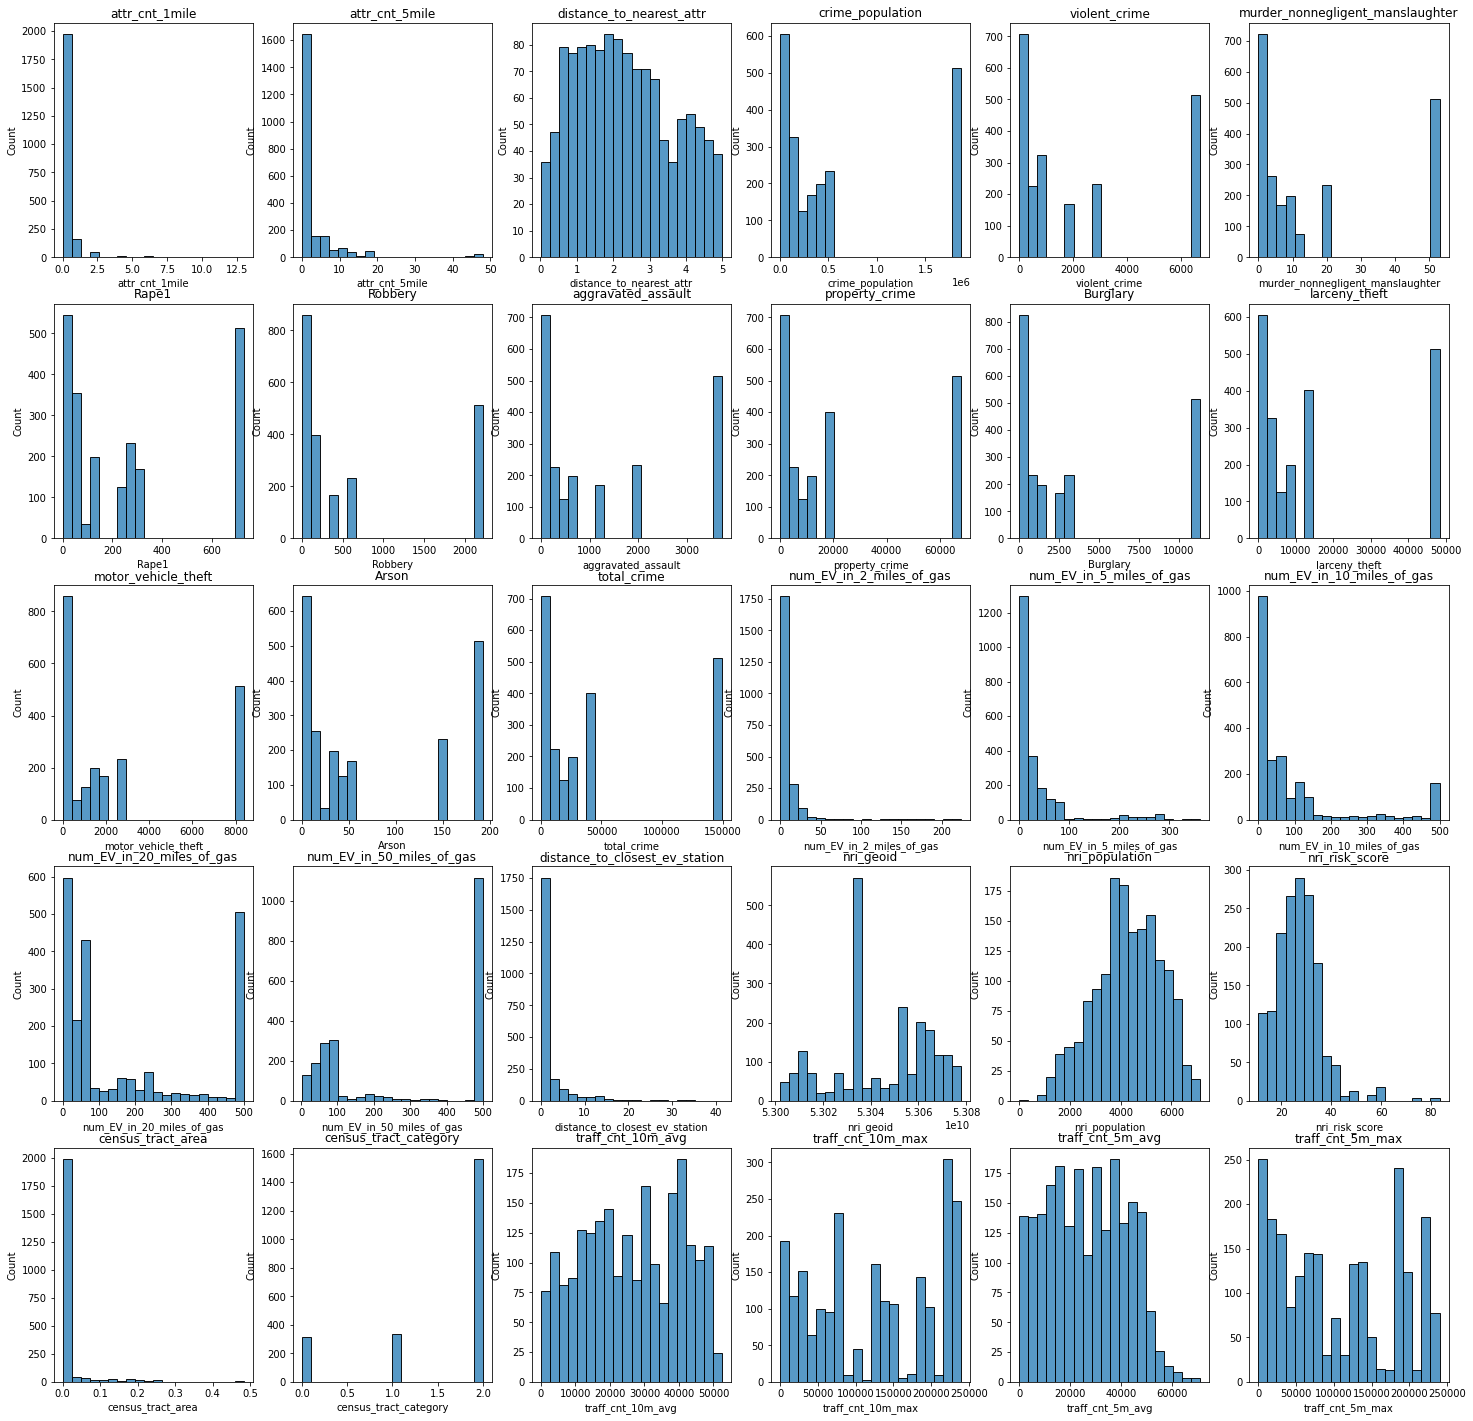

In [343]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(5,6, figsize=(25, 25))
for (i,col) in enumerate(df_train.columns.values):
    # print((i//6,i%6))
    sns.histplot(ax=ax[i//6][i%6], data=df_train[col].dropna(), bins=20)
    ax[i//6][i%6].set_title(col)

plt.savefig('plot/histplot_attr_dist.png')

In [344]:
# df_train.groupby('nri_geoid').agg('nunique').crime_population.sort_values().index[-2:]
#  53033020301.0, 53027000700.0 has 2 unique values
# df_train.groupby('nri_geoid').crime_population.apply(lambda x: list(np.unique(x))).loc[[53033020301.0, 53027000700.0]]
# to deal with census tracts with multiple crime population value, take average.
df_train.isna().sum().sort_values(ascending=False)

distance_to_nearest_attr            965
nri_risk_score                      607
nri_population                      606
property_crime                       41
total_crime                          41
Arson                                41
motor_vehicle_theft                  41
larceny_theft                        41
Burglary                             41
aggravated_assault                   41
Robbery                              41
Rape1                                41
murder_nonnegligent_manslaughter     41
violent_crime                        41
crime_population                     41
traff_cnt_5m_avg                      0
traff_cnt_10m_max                     0
traff_cnt_10m_avg                     0
census_tract_category                 0
census_tract_area                     0
attr_cnt_1mile                        0
num_EV_in_2_miles_of_gas              0
nri_geoid                             0
distance_to_closest_ev_station        0
num_EV_in_50_miles_of_gas             0


In [345]:
# check if every census tract in the same city have same crime population
tract_w_na = df_train[df_train.crime_population.isna()].nri_geoid.unique()
for i in tract_w_na:
    print(i, df_train[df_train.nri_geoid == i].crime_population.unique())

53019970200.0 [nan]
53059950300.0 [nan]
53069950100.0 [nan]
53059950200.0 [nan]
53043960200.0 [nan]
53043960300.0 [nan]
53055960101.0 [nan]
53055960103.0 [nan]
53013960200.0 [nan]
53055960301.0 [nan]
53055960400.0 [nan]
53059950500.0 [nan]
53003960300.0 [nan]
53019940000.0 [nan]
53055960501.0 [nan]
53019970100.0 [nan]
53003960100.0 [nan]
53043960400.0 [nan]
53043960100.0 [nan]


In [248]:
# fill nri_population nan values
df_train.nri_population.fillna(df_train.nri_population.mean(), inplace=True)
# fill nri_risk_score nan values
df_train.nri_risk_score.fillna(df_train.nri_risk_score.mean(), inplace=True)
# fill crime nan values by city category
col = ['crime_population', 'violent_crime',
       'murder_nonnegligent_manslaughter', 'Rape1', 'Robbery',
       'aggravated_assault', 'property_crime', 'Burglary',
       'larceny_theft', 'motor_vehicle_theft', 'Arson', 'total_crime']
df_train = df_train.groupby('census_tract_category').apply(lambda x: x.fillna(x.mean()))
# print nan values
df_train.isna().sum().sort_values(ascending=False)[:10]

distance_to_nearest_attr    965
attr_cnt_1mile                0
num_EV_in_5_miles_of_gas      0
traff_cnt_5m_avg              0
traff_cnt_10m_max             0
traff_cnt_10m_avg             0
census_tract_category         0
census_tract_area             0
nri_risk_score                0
nri_population                0
dtype: int64

## aggregate entry by census tract: by average

In [353]:
# TODO: aggregate entry by census tract: by average
X = df_train.groupby('nri_geoid').mean()
X.head()

## fill aggregated feature na values

In [272]:
feat_by_census_tract = pd.read_csv("data/feat_by_census_tract.csv")
feat_by_census_tract = feat_by_census_tract.rename(columns=dict(zip(feat_by_census_tract.columns, ['GEOID', "ev_cnt", 'attr_cnt', 'traffic_cnt', 'traffic_max', 'traffic_avg'])))
print(feat_by_census_tract.shape)
feat_by_census_tract.head()

(1780, 8)


,GEOID,ev_cnt,attr_cnt,traffic_cnt,traffic_max,traffic_avg,geometry,category
0,5.303301e+10,NaN,NaN,NaN,NaN,NaN,0.000454,2
1,5.305306e+10,NaN,NaN,NaN,NaN,NaN,0.000114,2
2,5.305307e+10,NaN,NaN,NaN,NaN,NaN,0.000483,2
3,5.306799e+10,NaN,NaN,NaN,NaN,NaN,0.000009,2
4,5.307700e+10,NaN,NaN,NaN,NaN,NaN,0.000069,2


In [273]:
feat_by_census_tract.isna().sum()

GEOID             0
ev_cnt         1241
attr_cnt       1402
traffic_cnt     726
traffic_max     726
traffic_avg     726
geometry          0
category          0
dtype: int64

In [275]:
feat_by_census_tract.groupby('category').mean()

,GEOID,ev_cnt,attr_cnt,traffic_cnt,traffic_max,traffic_avg,geometry
category,,,,,,,
0,5.304258e+10,1.666667,2.528302,10.231156,14209.497487,7037.867740,0.085754
1,5.304498e+10,1.912281,1.541667,7.048193,29559.638554,14981.044174,0.005065
2,5.304206e+10,3.050119,2.097473,5.314949,57319.303338,30561.590107,0.000538


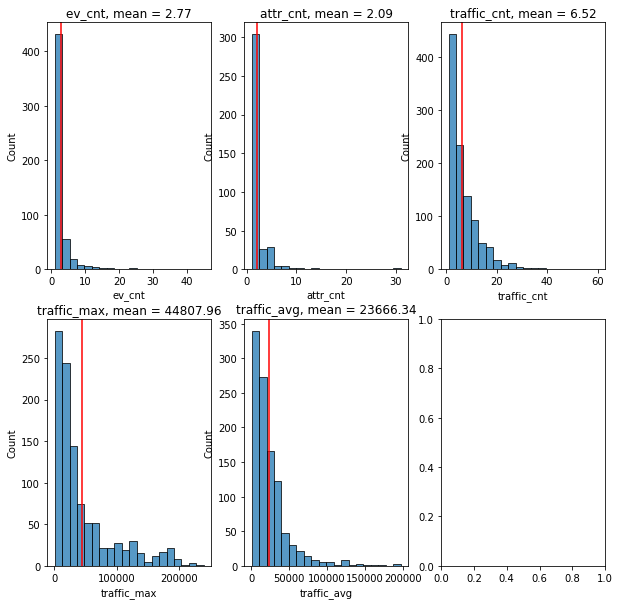

In [274]:
# check distribution
from matplotlib import pyplot as plt
fig, ax = plt.subplots(2,3, figsize=(10, 10))
for (i,col) in enumerate(feat_by_census_tract.columns.values[1:-2]):
    # print((i//6,i%6))
    sns.histplot(ax=ax[i//3][i%3], data=feat_by_census_tract[col].dropna(), bins=20)
    ax[i//3][i%3].axvline(x=feat_by_census_tract[col].mean(),color='red')
    ax[i//3][i%3].set_title("{0}, mean = {1}".format(col, feat_by_census_tract[col].mean().round(2)))

plt.savefig('plot/histplot_attr_dist_feat_by_census_tract.png')

In [350]:
# fill nan values by zeros
feat_by_census_tract.ev_cnt = feat_by_census_tract.ev_cnt.fillna(0) 
feat_by_census_tract.attr_cnt = feat_by_census_tract.attr_cnt.fillna(0) 
feat_by_census_tract.traffic_cnt = feat_by_census_tract.traffic_cnt.fillna(0) 
# fill nan values by mean of each category
feat_by_census_tract = feat_by_census_tract.groupby('category').apply(lambda x: x.fillna(x.mean()))
feat_by_census_tract.isna().sum()

GEOID          0
ev_cnt         0
attr_cnt       0
traffic_cnt    0
traffic_max    0
traffic_avg    0
geometry       0
category       0
dtype: int64

## combine two dataset

In [356]:
X

,attr_cnt_1mile,attr_cnt_5mile,distance_to_nearest_attr,crime_population,violent_crime,murder_nonnegligent_manslaughter,Rape1,Robbery,aggravated_assault,property_crime,...,num_EV_in_50_miles_of_gas,distance_to_closest_ev_station,nri_population,nri_risk_score,census_tract_area,census_tract_category,traff_cnt_10m_avg,traff_cnt_10m_max,traff_cnt_5m_avg,traff_cnt_5m_max
nri_geoid,,,,,,,,,,,,,,,,,,,,,
5.300195e+10,0.0,0.0,2.461667,10033.000000,8.000000,0.000000,3.000000,1.000000,4.000000,202.000000,...,20.142857,0.244943,2447.000000,24.762034,0.192617,0.0,6982.772535,21000.0,7060.760177,21000.0
5.300195e+10,0.0,0.0,2.461667,10033.000000,8.000000,0.000000,3.000000,1.000000,4.000000,202.000000,...,36.000000,10.637300,1738.000000,27.542865,0.310769,0.0,2769.285714,9400.0,3745.555556,9400.0
5.300195e+10,0.0,0.0,2.300410,10033.000000,8.000000,0.000000,3.000000,1.000000,4.000000,202.000000,...,36.000000,18.232733,4753.000000,16.621634,0.001465,2.0,5886.363636,9500.0,6100.000000,9500.0
5.300396e+10,0.0,0.0,2.461667,157688.628472,580.513889,4.607639,75.375000,154.857639,345.673611,5547.500000,...,10.000000,5.859500,4304.000000,18.120730,0.157066,0.0,6546.666667,25000.0,4713.000000,8300.0
5.300396e+10,0.0,0.0,2.300410,757877.521823,2850.672657,21.649551,329.789474,857.874198,1641.359435,27469.935815,...,10.000000,0.421050,3775.000000,12.215179,0.000532,2.0,6453.888889,25000.0,7318.214286,25000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5.307700e+10,0.0,0.0,2.461667,149495.000000,531.000000,11.000000,58.000000,123.000000,339.000000,4736.000000,...,40.500000,19.824600,3815.666667,25.380378,0.295283,0.0,1478.333333,2050.0,1000.000000,1000.0
5.307700e+10,0.0,0.0,2.512219,149495.000000,531.000000,11.000000,58.000000,123.000000,339.000000,4736.000000,...,33.000000,2.194200,5232.000000,21.554238,0.007823,1.0,14497.878788,51000.0,12828.666667,50000.0
5.307700e+10,0.0,1.0,4.755300,149495.000000,531.000000,11.000000,58.000000,123.000000,339.000000,4736.000000,...,32.000000,2.883400,6682.000000,19.569045,0.001287,2.0,14516.691729,51000.0,14060.000000,51000.0


In [357]:
feat_by_census_tract.set_index('GEOID', inplace=True)

,ev_cnt,attr_cnt,traffic_cnt,traffic_max,traffic_avg,geometry,category
GEOID,,,,,,,
5.303301e+10,0.0,0.0,0.0,57319.303338,30561.590107,0.000454,2
5.305306e+10,0.0,0.0,0.0,57319.303338,30561.590107,0.000114,2
5.305307e+10,0.0,0.0,0.0,57319.303338,30561.590107,0.000483,2
5.306799e+10,0.0,0.0,0.0,57319.303338,30561.590107,0.000009,2
5.307700e+10,0.0,0.0,0.0,57319.303338,30561.590107,0.000069,2
...,...,...,...,...,...,...,...
5.303509e+10,0.0,0.0,2.0,8500.000000,7200.000000,0.003046,1
5.304197e+10,0.0,1.0,17.0,4200.000000,1931.176471,0.206779,0
5.303301e+10,4.0,1.0,0.0,57319.303338,30561.590107,0.000058,2


In [368]:
X_data = X.merge(feat_by_census_tract, left_on='nri_geoid', right_on='GEOID')
X_data.index = X_data.index.astype(int).astype(str)
print(X_data.shape)
X_data.head()

(1045, 37)


,attr_cnt_1mile,attr_cnt_5mile,distance_to_nearest_attr,crime_population,violent_crime,murder_nonnegligent_manslaughter,Rape1,Robbery,aggravated_assault,property_crime,...,traff_cnt_5m_avg,traff_cnt_5m_max,GEOID,ev_cnt,attr_cnt,traffic_cnt,traffic_max,traffic_avg,geometry,category
0,0.0,0.0,2.461667,10033.000000,8.000000,0.000000,3.000000,1.000000,4.000000,202.000000,...,7060.760177,21000.0,5.300195e+10,4.0,0.0,60.0,21000.0,6340.833333,0.192617,0
1,0.0,0.0,2.461667,10033.000000,8.000000,0.000000,3.000000,1.000000,4.000000,202.000000,...,3745.555556,9400.0,5.300195e+10,0.0,0.0,37.0,12000.0,2252.162162,0.310769,0
2,0.0,0.0,2.300410,10033.000000,8.000000,0.000000,3.000000,1.000000,4.000000,202.000000,...,6100.000000,9500.0,5.300195e+10,0.0,0.0,6.0,9500.0,7083.333333,0.001465,2
3,0.0,0.0,2.461667,157688.628472,580.513889,4.607639,75.375000,154.857639,345.673611,5547.500000,...,4713.000000,8300.0,5.300396e+10,0.0,1.0,8.0,4900.0,1561.250000,0.157066,0
4,0.0,0.0,2.300410,757877.521823,2850.672657,21.649551,329.789474,857.874198,1641.359435,27469.935815,...,7318.214286,25000.0,5.300396e+10,1.0,0.0,13.0,25000.0,9792.307692,0.000532,2


In [370]:
X_data.isna().sum().sum()

0

In [371]:
X_data.category.value_counts()

2    771
0    138
1    136
Name: category, dtype: int64

In [372]:
X_data.to_csv('train_data.csv')